<a href="https://colab.research.google.com/github/micah-shull/LLMs/blob/main/LLM_025_tuning_LLM_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here’s a structured lesson plan to guide you through fine-tuning a large language model (LLM), focusing on essential concepts and practical steps. This plan will break down the core components and provide you with a solid understanding of the process before diving into code.

---

## Fine-Tuning a Large Language Model (LLM)

---

#### **1. Introduction to Fine-Tuning Large Language Models**
   - **Goal**: Understand the purpose of fine-tuning and when to apply it to LLMs.
   - **Key Concepts**:
     - **Pre-trained Model**: Understand that pre-trained models, like GPT, BERT, etc., have learned language patterns and structures but may need further tuning for specific tasks (e.g., sentiment analysis, summarization).
     - **Fine-Tuning vs. Pre-training**: Know that pre-training is the initial phase, involving large datasets, while fine-tuning adapts the model to a narrower, task-specific dataset.
   - **Takeaway**: Fine-tuning leverages the model’s learned language structures for specific applications, reducing the need for vast compute resources.

---

#### **2. Preparing Data for Fine-Tuning**
   - **Goal**: Learn data selection and preparation techniques for effective fine-tuning.
   - **Key Concepts**:
     - **Data Relevance**: Choosing data that closely matches your target task. For example, for a sentiment analysis task, choose a dataset with labeled sentiments.
     - **Data Formatting**: Structuring data in formats that align with LLMs (usually text paired with labels, sometimes in JSON/CSV format).
     - **Tokenization**: Prepare text data by breaking it down into tokens. Key concepts here include `padding`, `truncation`, and the importance of uniform input sizes.
   - **Takeaway**: Properly prepared data is essential for smooth fine-tuning and effective task adaptation.

---

#### **3. Understanding and Setting Hyperparameters**
   - **Goal**: Familiarize yourself with tuning parameters that affect training speed, accuracy, and generalization.
   - **Key Concepts**:
     - **Learning Rate**: A critical hyperparameter that controls the model’s adjustments at each step; setting this value too high or low can hinder performance.
     - **Batch Size**: Impacts memory usage and stability; large models typically require smaller batch sizes.
     - **Epochs**: Number of times the model goes through the entire dataset. Too many epochs can lead to overfitting; too few may underfit.
   - **Takeaway**: Understanding these hyperparameters is crucial for optimizing performance without over- or under-training the model.

---

#### **4. Choosing a Fine-Tuning Method**
   - **Goal**: Explore different techniques for fine-tuning, focusing on the most popular ones.
   - **Key Concepts**:
     - **Standard Fine-Tuning**: Updating all parameters of the model, typically more resource-intensive.
     - **Parameter-Efficient Fine-Tuning (PEFT)**: Techniques like LoRA, Adapter Layers, and Prompt Tuning that update only a subset of parameters or add small, trainable modules to the model.
   - **Takeaway**: Choose an appropriate method based on your compute resources and task complexity; PEFT methods like LoRA are useful for large LLMs with constrained resources.

---

#### **5. Training Process**
   - **Goal**: Execute the fine-tuning process and understand each step.
   - **Key Concepts**:
     - **Forward Propagation**: Understand how the model makes predictions by passing inputs forward through the network.
     - **Loss Calculation**: Measure the error of predictions, often with cross-entropy loss for classification tasks.
     - **Backward Propagation**: Update model weights based on loss gradients to minimize error. Learn about **gradients** and **optimizers** (e.g., AdamW).
   - **Takeaway**: Each training step adjusts the model to better match your task-specific dataset by minimizing the error.

---

#### **6. Evaluation and Metrics**
   - **Goal**: Assess the model’s performance with relevant metrics.
   - **Key Concepts**:
     - **Accuracy, Precision, Recall, F1-Score**: Understand these metrics for classification tasks.
     - **Validation and Test Sets**: The importance of keeping test data separate to get an unbiased measure of the model’s real-world performance.
   - **Takeaway**: Effective evaluation ensures that the model performs well on unseen data and provides insight into areas for further tuning.

---

#### **7. Saving, Loading, and Deploying the Model**
   - **Goal**: Make your fine-tuned model reusable and deployable.
   - **Key Concepts**:
     - **Model Serialization**: Saving the model and tokenizer so they can be loaded later without retraining.
     - **Deploying with APIs**: Briefly introduce options for deploying the model using APIs or integrating with web apps.
   - **Takeaway**: Saved models can be reused or further fine-tuned, and deployment enables real-world applications.

---

#### **8. Advanced Techniques (Optional)**
   - **Goal**: Explore advanced fine-tuning concepts if you’re comfortable with the basics.
   - **Key Concepts**:
     - **Hyperparameter Tuning**: Use tools like grid search or Bayesian optimization to find the best hyperparameters.
     - **Ensemble Methods**: Combine models to improve accuracy or robustness.
     - **Knowledge Distillation**: Compress large models into smaller, faster versions while preserving performance.
   - **Takeaway**: Advanced techniques can further optimize and refine your model’s performance, but they require a strong grasp of fine-tuning fundamentals.

---

### Summary
This lesson plan covers the essential steps and concepts you need to know to fine-tune a large language model. Each step builds on the last, reinforcing core knowledge and ensuring you’re equipped with both the theoretical background and practical skills to fine-tune LLMs effectively.





In [3]:
# !pip install transformers datasets
# !pip install python-dotenv

### Import Libaries

In [8]:
import os
import openai
from dotenv import load_dotenv
from transformers import pipeline
from datasets import load_dataset

# Load environment variables
load_dotenv('/content/huggingface_api_key.env')
api_key = os.getenv("HUGGINGFACE_API_KEY")
os.environ["HF_TOKEN"] = api_key

# Load the Amazon Reviews dataset
dataset = load_dataset("imdb")

# Split data into documents and labels for training and testing
documents = dataset["train"]["text"]
labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]

# Quick preview of dataset
print("Sample IMDb Review Text:", documents[0])
print("Sample IMDb Review Label:", labels[0])

Sample IMDb Review Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are

In [10]:
# Display the first few entries in the training dataset
for i in range(3):
    print(f"Review {i+1}:")
    print("Text:", dataset["train"]["text"][i])
    print("Label:", "Positive" if dataset["train"]["label"][i] == 1 else "Negative")
    print("="*50)

Review 1:
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and 

### Visualize Data

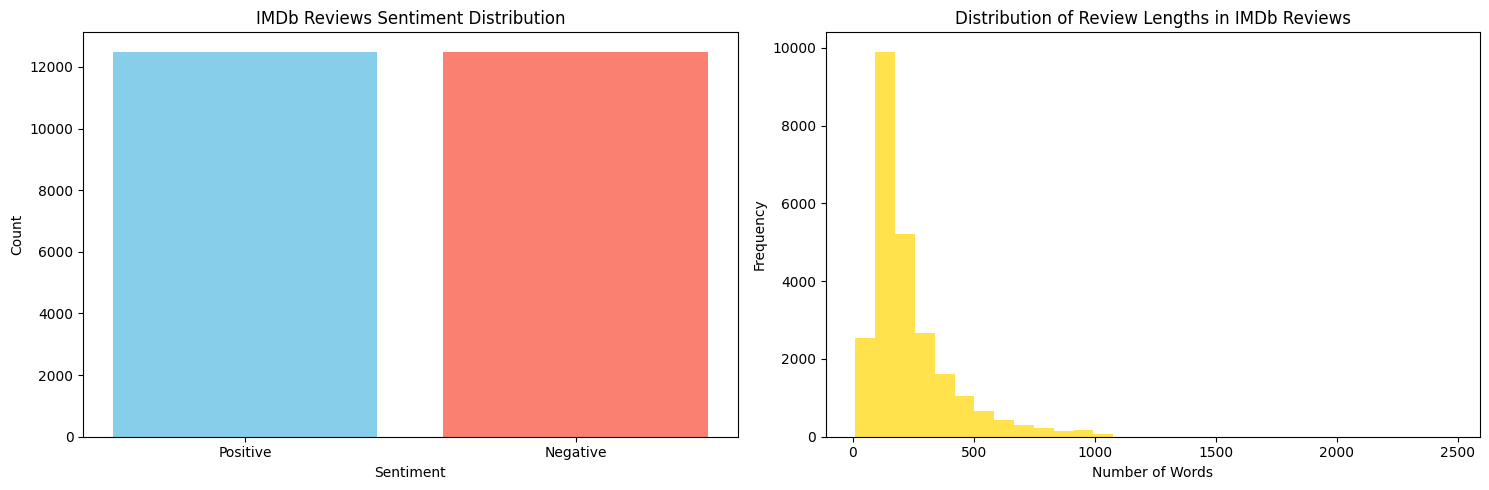

Review Length Statistics:
Mean Length: 233.7872
Max Length: 2470
Min Length: 10


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract labels and documents from the IMDb dataset
documents = dataset["train"]["text"]
labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]

# Calculate and print value counts for labels
label_counts = pd.Series(labels).value_counts()

# Calculate review lengths
review_lengths = [len(review.split()) for review in documents]

# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Label Distribution
axes[0].bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title("IMDb Reviews Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(label_counts.index)))
axes[0].set_xticklabels(["Positive", "Negative"])

# Plot 2: Review Length Distribution
axes[1].hist(review_lengths, bins=30, color='gold', alpha=0.7)
axes[1].set_title("Distribution of Review Lengths in IMDb Reviews")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display basic statistics
print("Review Length Statistics:")
print("Mean Length:", sum(review_lengths) / len(review_lengths))
print("Max Length:", max(review_lengths))
print("Min Length:", min(review_lengths))


### Sample the Data

In [14]:
import random

# Set the sample fraction (e.g., 5%)
sample_fraction = 0.05

# Sample from the training data
train_documents = dataset["train"]["text"]
train_labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]
train_sample_size = int(len(train_documents) * sample_fraction)

# Randomly sample reviews and labels from the training set
random.seed(42)
train_sample_indices = random.sample(range(len(train_documents)), train_sample_size)
train_texts = [train_documents[i] for i in train_sample_indices]
train_labels = [train_labels[i] for i in train_sample_indices]

# Sample from the test data
test_documents = dataset["test"]["text"]
test_labels = ["pos" if label == 1 else "neg" for label in dataset["test"]["label"]]
test_sample_size = int(len(test_documents) * sample_fraction)

# Randomly sample reviews and labels from the test set
test_sample_indices = random.sample(range(len(test_documents)), test_sample_size)
test_texts = [test_documents[i] for i in test_sample_indices]
test_labels = [test_labels[i] for i in test_sample_indices]

# Print the number of samples in each split
print("Number of training samples:", len(train_texts))
print("Number of testing samples:", len(test_texts))

Number of training samples: 1250
Number of testing samples: 1250


### Train Test Split
If the dataset already has predefined training and testing splits, as the IMDb dataset does, you **don’t need to use `train_test_split`** again. You can simply sample from each of these splits directly.

- **Separate Sampling for Train and Test**: Since the IMDb dataset already has a `train` and `test` split, we sample 5% from each directly, without mixing data between the two sets.
- **Random Sampling from Each Split**: We use `random.sample()` separately for `train` and `test`, maintaining independence between the two subsets.

### Benefits of Using Predefined Splits
Using the existing `train` and `test` splits is beneficial because:
- **Consistency**: Many datasets are split to reflect real-world distributions, so using predefined splits can lead to more realistic evaluations.
- **Avoids Data Leakage**: By not mixing data from `train` and `test`, you reduce the risk of data leakage, where information from the test set inadvertently influences the training process.


### Tokenize the Data

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the training set
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)

# Tokenize the test set
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Optional: Inspect tokenization on a few examples
sample_texts = train_texts[:3]  # First three reviews in the training sample
sample_labels = train_labels[:3]
tokenized_texts = tokenizer(sample_texts, padding=True, truncation=True, max_length=128)

# Display the original and tokenized versions
for i, text in enumerate(sample_texts):
    print(f"Original Review {i+1}:")
    print("Text:", text)
    print("Label:", "Positive" if sample_labels[i] == "pos" else "Negative")
    print("\nTokenized Review:", tokenized_texts["input_ids"][i])
    print("Attention Mask:", tokenized_texts["attention_mask"][i])
    print("="*50)

Original Review 1:
Text: Arguably this is a very good "sequel", better than the first live action film 101 Dalmatians. It has good dogs, good actors, good jokes and all right slapstick! <br /><br />Cruella DeVil, who has had some rather major therapy, is now a lover of dogs and very kind to them. Many, including Chloe Simon, owner of one of the dogs that Cruella once tried to kill, do not believe this. Others, like Kevin Shepherd (owner of 2nd Chance Dog Shelter) believe that she has changed. <br /><br />Meanwhile, Dipstick, with his mate, have given birth to three cute dalmatian puppies! Little Dipper, Domino and Oddball...<br /><br />Starring Eric Idle as Waddlesworth (the hilarious macaw), Glenn Close as Cruella herself and Gerard Depardieu as Le Pelt (another baddie, the name should give a clue), this is a good family film with excitement and lots more!! One downfall of this film is that is has a lot of painful slapstick, but not quite as excessive as the last film. This is also fu

### Organizing Data for Model Input

The next step is to prepare the tokenized data for training by organizing it into a format that the model can work with. Hugging Face models expect data in a specific structure, typically a PyTorch `Dataset` format. We’ll wrap our tokenized data (`train_encodings` and `test_encodings`) into a custom `Dataset` class so that it’s compatible with Hugging Face’s `Trainer` API.

1. **Create a Custom Dataset Class**:
   - This class will wrap around `train_encodings` and `train_labels` (and similarly for test data).
   - It will format the data into a PyTorch `Dataset` so that it can be fed into the model.

2. **Convert Labels to Numeric Format**:
   - Since labels are strings (`"pos"` or `"neg"`), we’ll convert them to numerical values (`1` for positive and `0` for negative).

---

Here are the most important concepts to focus on regarding this `IMDbDataset` class:

### 1. **Why We Need a Custom Dataset Class**
   - **Compatibility with PyTorch**: Hugging Face's `Trainer` API, which we'll use for training, is built to work seamlessly with PyTorch `Dataset` objects. By creating a custom `IMDbDataset` class, we make our data compatible with `Trainer` and PyTorch’s `DataLoader`, allowing for efficient batch processing during training.
   - **Standardized Access**: This class provides a structured way to access both the tokenized input data (`input_ids`, `attention_mask`) and the labels, so that each sample has both the input and label ready in a format the model expects.

### 2. **Key Roles of the Class Methods**
   - **`__getitem__`**: This method is crucial because it retrieves a single sample (input and label) in a consistent format. This structure is essential for iterating through the data during training, where each input-label pair needs to be correctly formatted.
   - **`__len__`**: This method defines the dataset length, allowing PyTorch to understand the size of the dataset, which is needed for training loops.

### 3. **Converting Labels to Tensors**
   - **Numerical Labels**: The model expects numerical labels for binary classification, so we convert `"pos"` to `1` and `"neg"` to `0`. This conversion allows the model’s output to be compared directly to the target labels during training, enabling it to calculate loss and make updates accordingly.
   - **Tensor Format**: PyTorch requires data to be in tensor format for efficient computations. By converting both the inputs and labels to tensors here, we ensure compatibility with PyTorch operations.

---

### Key Takeaways
- **Standardization for Model Training**: This class standardizes data access, ensuring each batch the model receives is in the correct format.
- **PyTorch Compatibility**: Wrapping data in a `Dataset` makes it compatible with the tools used in training, like `Trainer` and `DataLoader`.
- **Label Processing**: This step ensures that labels are in a usable, numerical format for binary classification.

With this class in place, you’re ready to configure the training process, as the data is now in the ideal structure for training. Let me know if you’re ready for the next step!


In [20]:
import torch
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        # Convert labels to tensor format (1 for "pos" and 0 for "neg")
        self.labels = torch.tensor([1 if label == "pos" else 0 for label in labels])

    def __getitem__(self, idx):
        # Get the item at the given index and add labels as 'labels' key
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create the training and testing dataset objects
train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

In [30]:
print("Sample from train_dataset:\n")
print(train_dataset[0]['input_ids'])
print(train_dataset[0]['attention_mask'])
print(train_dataset[0]['labels'])

Sample from train_dataset:

tensor([  101, 15835,  2023,  2003,  1037,  2200,  2204,  1000,  8297,  1000,
         1010,  2488,  2084,  1996,  2034,  2444,  2895,  2143,  7886, 17488,
        18900,  7066,  1012,  2009,  2038,  2204,  6077,  1010,  2204,  5889,
         1010,  2204, 13198,  1998,  2035,  2157, 14308, 21354,   999,  1026,
         7987,  1013,  1028,  1026,  7987,  1013,  1028, 10311,  2721,  6548,
         1010,  2040,  2038,  2018,  2070,  2738,  2350,  7242,  1010,  2003,
         2085,  1037,  7089,  1997,  6077,  1998,  2200,  2785,  2000,  2068,
         1012,  2116,  1010,  2164,  9318,  4079,  1010,  3954,  1997,  2028,
         1997,  1996,  6077,  2008, 10311,  2721,  2320,  2699,  2000,  3102,
         1010,  2079,  2025,  2903,  2023,  1012,  2500,  1010,  2066,  4901,
        11133,  1006,  3954,  1997,  3416,  3382,  3899,  7713,  1007,  2903,
         2008,  2016,  2038,  2904,  1012,  1026,  7987,  1013,  1028,  1026,
         7987,  1013,  1028,  5564, 

### Attention Mask
The **attention mask** is a key concept in transformer models. It’s used to indicate which tokens (words or subwords) in the input are actual content versus padding. Here’s a breakdown of what it is and why it matters:

### 1. **Purpose of the Attention Mask**
   - Transformer models, like BERT and DistilBERT, work with **fixed-length inputs**, meaning all sequences (e.g., sentences) need to be the same length.
   - To make sequences of different lengths uniform, shorter sequences are padded with extra tokens (usually zeros) to reach the maximum length. These padding tokens are not real words and don’t contain useful information.
   - The **attention mask** tells the model which tokens are actual data and which are just padding, helping the model **ignore padding** during processing.

### 2. **How the Attention Mask Works**
   - Each position in the attention mask is a binary value:
     - `1` means the token at that position is **important** (an actual word or subword).
     - `0` means the token is **padding** and should be ignored.
   - When the model applies attention, it can use this mask to focus only on meaningful tokens, preventing it from wasting computation on padding tokens.

### 3. **Why the Attention Mask is Important**
   - **Efficiency**: It helps the model to ignore irrelevant tokens, improving the efficiency of computations.
   - **Accuracy**: By focusing only on real tokens, the model can generate more accurate representations of the input text, which improves its ability to understand and respond to the data.

### Example

Suppose we have the sentence, `"This is a test"`, with a maximum length of 6 tokens:

- **Tokenized input**: `[This, is, a, test, [PAD], [PAD]]`
- **Attention mask**: `[1, 1, 1, 1, 0, 0]`

Here, the first four tokens are actual words, while the last two tokens are padding. The attention mask `[1, 1, 1, 1, 0, 0]` tells the model to focus on the first four tokens and ignore the last two during processing.

### Key Takeaway
The attention mask is essential for helping transformer models handle variable-length inputs efficiently by distinguishing between real content and padding. This allows the model to allocate its attention effectively, improving both computational efficiency and model accuracy.

### **Define Training Parameters**

The `TrainingArguments` class helps configure important settings for training. Here’s what we’ll configure:

- **Batch Size**: The number of samples processed together in one forward/backward pass. Smaller batch sizes help prevent memory issues.
- **Learning Rate**: Determines the step size at each iteration while moving toward the minimum of the loss function.
- **Number of Epochs**: Number of times the model will go through the entire dataset.
- **Logging and Evaluation**: How frequently the model logs progress and evaluates performance on the test set.

In [36]:
from transformers import TrainingArguments

# Define training arguments with W&B logging disabled
training_args = TrainingArguments(
    output_dir="./results",             # Output directory for saving results
    eval_strategy="epoch",        # Evaluate at the end of each epoch
    per_device_train_batch_size=8,      # Batch size for training
    per_device_eval_batch_size=8,       # Batch size for evaluation
    num_train_epochs=1,                 # Number of training epochs
    learning_rate=2e-5,                 # Initial learning rate
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir="./logs",               # Directory for storing logs
    logging_steps=10,                   # Log every 10 steps
    report_to="none"                    # Disables W&B logging
)


### **Initialize the `Trainer`**

With `training_args` defined, we can initialize the `Trainer` class, passing it:
- The **model** we want to fine-tune.
- The **training and testing datasets** (`train_dataset` and `test_dataset`).
- The **training arguments**.
- The **compute_metrics** function to evaluate performance on each epoch.



In [37]:
from transformers import Trainer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Define a compute_metrics function to evaluate performance
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=test_dataset,           # Evaluation dataset
    compute_metrics=compute_metrics      # Function to compute evaluation metrics
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Warning Message

The message you’re seeing is normal when using `DistilBERT` or similar models for a classification task. It indicates that **some layers have been newly initialized** because they’re specific to the classification task, and they weren’t part of the pre-trained DistilBERT model.

Here’s a bit more context on what this means and why it’s expected:

### Explanation of the Message

1. **New Layers for Classification**:
   - The original `distilbert-base-uncased` model was pre-trained on a general language modeling task, not on a classification task.
   - When you load `DistilBertForSequenceClassification`, it adds new layers specifically for classification, such as `classifier` and `pre_classifier`. These layers don’t have pre-trained weights, so they’re initialized randomly.

2. **Why This Is Normal**:
   - This message is a reminder that because these new layers were initialized randomly, the model should be fine-tuned on your specific classification task (IMDb sentiment analysis, in this case) to learn meaningful weights for those layers.
   - Fine-tuning will adjust all the model’s layers (both the pre-trained base and newly added classification layers) to your task, so it’s expected to see this message before training.

3. **No Action Required**:
   - You don’t need to do anything extra in response to this message; just proceed with training. The `Trainer` will fine-tune the model, updating both the pre-trained and new layers.

### Summary

This message is simply a reminder that the model should be trained on your task before using it for inference. Since we’re already in the process of fine-tuning, this is expected and requires no further action.

Once training is complete, the model’s weights (including the classification layers) will be adjusted based on your IMDb data, making it ready for predictions. You’re good to go—start training, and let me know if you have further questions!

### **Start Training**

With the `Trainer` set up, we’re ready to start training. This process will automatically log progress and evaluate the model at each epoch.


### Explanation of Key Concepts

- **TrainingArguments**: This controls key aspects of training like batch size, logging, and learning rate, helping manage training efficiency and performance.
- **Trainer API**: This simplifies the training loop and evaluation, allowing us to focus on configuration rather than manual coding.
- **compute_metrics**: Provides metrics like accuracy, precision, recall, and F1 score to help monitor model performance during training.

This should start the fine-tuning process! Let me know if you’d like any further explanation on these steps or if you’re ready to start training.

In [38]:
import time

# Start the timer
start_time = time.time()

# Start training
trainer.train()

# End the timer
end_time = time.time()

# Calculate and print the duration in minutes
duration = (end_time - start_time) / 60
print(f"Tokenization completed in {duration:.2f} minutes.")

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.420500,0.447982,0.797600,0.800944,0.792835,0.809221


Tokenization completed in 22.26 minutes.


### Evaluate Model

In [40]:
# Start the timer
start_time = time.time()

# Evaluate the model on the test dataset
eval_results = trainer.evaluate()
# print("Evaluation Results:", eval_results)


# Print each metric on a new line
print("Evaluation Results:")
for metric, value in eval_results.items():
    print(f"{metric}: {value}")


# End the timer
# end_time = time.time()

# Calculate and print the duration in minutes
# duration = (end_time - start_time) / 60
print(f"Tokenization completed in {duration:.2f} minutes.")

Evaluation Results: {'eval_loss': 0.4479823708534241, 'eval_accuracy': 0.7976, 'eval_f1': 0.8009441384736428, 'eval_precision': 0.7928348909657321, 'eval_recall': 0.809220985691574, 'eval_runtime': 275.835, 'eval_samples_per_second': 4.532, 'eval_steps_per_second': 0.569, 'epoch': 1.0}
Tokenization completed in 4.60 minutes.


In [42]:
from sklearn.metrics import classification_report
import numpy as np

# Start the timer
start_time = time.time()

# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Extract true labels and predicted labels
true_labels = predictions.label_ids
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Negative", "Positive"])
print(report)

# Calculate and print the duration in minutes
duration = (end_time - start_time) / 60
print(f"Tokenization completed in {duration:.2f} minutes.")


              precision    recall  f1-score   support

    Negative       0.80      0.79      0.79       621
    Positive       0.79      0.81      0.80       629

    accuracy                           0.80      1250
   macro avg       0.80      0.80      0.80      1250
weighted avg       0.80      0.80      0.80      1250

Tokenization completed in -1.33 minutes.


### Predict

In [43]:
# Example text for testing
sample_text = "I loved this movie! It was fantastic."

# Tokenize and make a prediction using the in-memory tokenizer and model
inputs = tokenizer(sample_text, return_tensors="pt", padding=True, truncation=True, max_length=128)
outputs = trainer.model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)

# Map predictions back to labels
label = "Positive" if predictions[0].item() == 1 else "Negative"
print("Prediction:", label)


Prediction: Positive


### Save Model & Tokenizer
Yes, saved transformer models and their tokenizers can be quite large, particularly for complex models with millions or even billions of parameters. Here’s a breakdown of why they are large and some considerations for managing these sizes.

### 1. **Why Are Saved Models So Large?**
   - **Number of Parameters**: Even smaller models like DistilBERT have tens of millions of parameters, while larger models like BERT or GPT-3 have hundreds of millions to billions of parameters. Each parameter is typically stored as a 32-bit floating-point number, so the more parameters, the larger the storage requirements.
   - **Tokenizers**: Tokenizer files can also be large, as they include vocabulary files and additional configurations necessary for consistent tokenization. Although they’re smaller than the model itself, they still contribute to the overall storage size.
   - **Configuration and Metadata**: Transformer models save not just the model weights but also configuration files (e.g., model architecture, hyperparameters) and training metadata, which, while minor, add to the file size.

### 2. **Typical Size for Saved Models**
   - **DistilBERT**: DistilBERT models, for instance, are usually around 200-300 MB when saved, depending on the specific fine-tuning layers added.
   - **BERT-Base**: Full BERT models are around 400-500 MB.
   - **Large Language Models (e.g., GPT-2, GPT-3)**: Models like GPT-2 and GPT-3 can reach several gigabytes, making storage and loading times significant.

### 3. **Options for Reducing Model Size**
If storage or deployment is a concern, there are some strategies for managing model sizes:

   - **Model Distillation**: Create a smaller, distilled version of the model that approximates the performance of the larger model but has fewer parameters (e.g., DistilBERT is a distilled version of BERT).
   - **Quantization**: Reduce the precision of model weights from 32-bit to 8-bit, which can significantly reduce model size without much impact on performance.
   - **Parameter-Efficient Fine-Tuning (PEFT)**: Techniques like LoRA (Low-Rank Adaptation) add only a few new parameters, so you only need to store these additional parameters rather than the entire model.
   - **Using Tokenizer Cache**: Hugging Face models store tokenizers and model weights in a cache directory, so you don’t need to download them each time if they’re already cached.

### 4. **Best Practices for Handling Large Models**
   - **Save Selectively**: Save the model and tokenizer only once when they’re fully trained and needed for deployment or inference.
   - **Cloud Storage**: Use cloud storage solutions (e.g., AWS S3, Google Cloud Storage) to store models if you’re working with many or very large models.
   - **On-Demand Loading**: If the model is only needed intermittently, you can load it into memory only when required to save memory and processing power.



In [ ]:
# Save the fine-tuned model
trainer.save_model("./finetuned-imdb-distilbert")  # Saves model weights and configuration
tokenizer.save_pretrained("./finetuned-imdb-distilbert")  # Saves tokenizer

### Load Model for Inference

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the saved model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("./finetuned-imdb-distilbert")
model = AutoModelForSequenceClassification.from_pretrained("./finetuned-imdb-distilbert")

# Example text for testing
sample_text = "I loved this movie! It was fantastic."

# Tokenize and make a prediction
inputs = tokenizer(sample_text, return_tensors="pt", padding=True, truncation=True, max_length=128)
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)

# Map predictions back to labels
label = "Positive" if predictions[0].item() == 1 else "Negative"
print("Prediction:", label)


### Training Script
Creating a training script is a great idea, especially if you plan to fine-tune multiple models or datasets. However, each dataset will have unique requirements, so the key is to build the script in a **modular and flexible** way. Here’s a strategy for achieving that:

### Why Use a Training Script?

1. **Efficiency**: A script helps automate the repetitive parts of model training, like loading data, setting up the model, defining training parameters, and evaluating performance.
2. **Consistency**: By standardizing your training process, you can ensure consistent steps across different experiments, which improves the reproducibility of results.
3. **Modularity**: You can build the script to support optional configurations, making it adaptable to different datasets or tasks without modifying the core structure.

### Key Components of a Flexible Training Script

To make the script adaptable to unique dataset needs, consider structuring it with customizable functions and parameter options.

#### 1. **Configurable Parameters**
   - Use a configuration file (e.g., JSON, YAML) or a command-line argument parser (`argparse`) to specify parameters like the model name, batch size, number of epochs, learning rate, and dataset location.
   - These configurable parameters let you adjust the script for each dataset or model by changing only the configuration, not the code.

#### 2. **Dataset-Specific Preprocessing Functions**
   - Each dataset may have unique preprocessing requirements (e.g., tokenization settings, label encoding). Write separate preprocessing functions or classes that can be called based on the dataset.
   - Example: Use a function to handle tokenization, label encoding, and attention mask generation specific to the input data.

#### 3. **Flexible Model and Tokenizer Loading**
   - Make the model loading step configurable so you can easily swap between models (e.g., BERT, DistilBERT, GPT-2).
   - Define the model in the script based on a parameter, such as `model_name`, which allows you to specify the desired pre-trained model.

#### 4. **Training and Evaluation Functions**
   - Wrap the training loop, evaluation, and metric calculation in reusable functions that can be called with different datasets or configurations.
   - Use `Trainer` or define a custom training loop, depending on the level of customization you need.

#### 5. **Save and Load Functionality**
   - Add save functions to export the fine-tuned model and tokenizer, along with a function to load the model and tokenizer for testing or inference.
   - Optional: Add checkpoints or early stopping if the training process is long or resource-intensive.


### Explanation of Each Section

- **Parameter Parsing**: `parse_args` lets you customize the script’s parameters without editing the code directly, supporting flexibility.
- **Data Loading and Preprocessing**: `load_and_preprocess_data` can include dataset-specific preprocessing logic, like handling unique labels or special tokenization requirements.
- **Model Training and Evaluation**: `train_model` and `evaluate_model` manage training and provide an evaluation summary, making it easy to swap datasets without changing core logic.
- **Modularity**: Each function is self-contained, enabling easy updates or replacements for individual components.

### Final Considerations

While each dataset will have specific needs, this modular approach allows you to plug in custom preprocessing functions, change model configurations, and control training parameters without rewriting the entire script each time. It combines efficiency with flexibility, making it ideal for handling multiple datasets while supporting experimentation.

Let me know if you'd like further guidance on implementing or adapting any specific part!

In [ ]:

import argparse
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import classification_report
import torch

# Step 1: Parse Configurations
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_name", type=str, default="distilbert-base-uncased")
    parser.add_argument("--dataset_name", type=str, default="imdb")
    parser.add_argument("--batch_size", type=int, default=8)
    parser.add_argument("--learning_rate", type=float, default=2e-5)
    parser.add_argument("--epochs", type=int, default=3)
    parser.add_argument("--output_dir", type=str, default="./model_output")
    return parser.parse_args()

# Step 2: Load Dataset
def load_and_preprocess_data(dataset_name, tokenizer):
    dataset = load_dataset(dataset_name)
    # Tokenize the dataset (define based on dataset requirements)
    # Return tokenized train and test splits
    pass

# Step 3: Initialize Model and Trainer
def train_model(model_name, train_dataset, test_dataset, args):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    training_args = TrainingArguments(
        output_dir=args.output_dir,
        evaluation_strategy="epoch",
        per_device_train_batch_size=args.batch_size,
        per_device_eval_batch_size=args.batch_size,
        learning_rate=args.learning_rate,
        num_train_epochs=args.epochs,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
    )

    trainer.train()
    return model, trainer

# Step 4: Evaluation
def evaluate_model(trainer, test_dataset):
    predictions = trainer.predict(test_dataset)
    true_labels = predictions.label_ids
    predicted_labels = torch.argmax(predictions.predictions, axis=1)
    report = classification_report(true_labels, predicted_labels)
    print(report)

# Main script
def main():
    args = parse_args()
    tokenizer = AutoTokenizer.from_pretrained(args.model_name)
    train_dataset, test_dataset = load_and_preprocess_data(args.dataset_name, tokenizer)
    model, trainer = train_model(args.model_name, train_dataset, test_dataset, args)
    evaluate_model(trainer, test_dataset)

if __name__ == "__main__":
    main()

### Parse Args Function

This `parse_args` function is designed to create a **configurable and flexible training script**. Here are the main lessons to focus on:

### 1. **Parameterizing the Script**
   - By using `argparse`, this code allows you to pass in different arguments from the command line, such as `model_name`, `dataset_name`, `batch_size`, etc., without changing the code directly. This makes the script adaptable and reusable, which is important when training on various datasets or experimenting with different configurations.
   - Each argument corresponds to an essential parameter in model training, such as the model architecture, dataset choice, training hyperparameters, and output location.

### 2. **Encouraging Experimentation and Reproducibility**
   - **Experimentation**: With these arguments, you can quickly experiment with different models, learning rates, batch sizes, or other hyperparameters by passing in different values, which speeds up experimentation.
   - **Reproducibility**: Defining these parameters explicitly allows you to easily log and track different experimental setups, making it easier to replicate results in the future.

### 3. **Scalability**
   - If you need to scale up and manage multiple training runs, this approach is efficient because it allows you to use a single script with various parameter combinations.
   - This pattern makes it possible to run the script programmatically, for instance, by calling it within a larger pipeline or loop that automates experiments over a range of values for each parameter.

### Key Takeaways

- **Modularity and Reusability**: The function is modular, making the script reusable across different datasets and models.
- **Efficiency**: It removes the need to edit code directly when changing configurations, reducing human error and saving time.
- **Experiment-Friendly**: This approach is essential for machine learning experiments, where adjusting parameters and tracking configurations is crucial.

By using `argparse` effectively, you’re setting up a robust foundation for systematic experimentation and quick adaptability in your training pipeline.

When you run a Python script with `argparse`, you can specify different argument values directly in the command line. Here are some examples based on the arguments in the `parse_args()` function.

Assuming your script is saved as `train_model.py`, you can adjust the arguments as follows:

### 1. Basic Command with Default Arguments
If you simply run:
```bash
python train_model.py
```
It will use all the default values defined in `parse_args()`:
- `model_name`: `"distilbert-base-uncased"`
- `dataset_name`: `"imdb"`
- `batch_size`: `8`
- `learning_rate`: `2e-5`
- `epochs`: `3`
- `output_dir`: `"./model_output"`

### 2. Specifying a Different Model and Dataset
To change the model and dataset, you can override `--model_name` and `--dataset_name`:
```bash
python train_model.py --model_name "bert-base-uncased" --dataset_name "yelp_polarity"
```
This will load the `bert-base-uncased` model and the `yelp_polarity` dataset for training.

### 3. Adjusting Hyperparameters for Faster Training
If you want to experiment with a larger batch size and fewer epochs, you could specify:
```bash
python train_model.py --batch_size 16 --epochs 2
```
This will train with a batch size of 16 and run for only 2 epochs.

### 4. Trying a Different Learning Rate
If you want to test a different learning rate (for example, a higher one), you can set `--learning_rate`:
```bash
python train_model.py --learning_rate 5e-5
```
This will set the learning rate to `5e-5` instead of the default `2e-5`.

### 5. Changing the Output Directory
You can change where the model and logs are saved by specifying `--output_dir`:
```bash
python train_model.py --output_dir "./my_experiment"
```
This will save all outputs to `./my_experiment` rather than the default `./model_output`.

### 6. Combining Multiple Argument Changes
You can change several arguments at once. For example:
```bash
python train_model.py --model_name "roberta-base" --dataset_name "ag_news" --batch_size 32 --learning_rate 3e-5 --epochs 5 --output_dir "./experiment_roberta"
```
This command will:
- Load the `roberta-base` model.
- Use the `ag_news` dataset.
- Set batch size to 32, learning rate to `3e-5`, and epochs to 5.
- Save results in the `./experiment_roberta` directory.

### General Tips for Argument Variations
- **Testing Parameters**: For quick tests, lower values for `--epochs` and `--batch_size` can speed up initial trials.
- **Different Output Directories**: Use unique output directories for each run so that you can compare results without overwriting previous ones.

Using these commands in the terminal makes it easy to experiment with different settings and keep track of how each variation affects model performance.

In [ ]:
import time

# Start the timer
start_time = time.time()

# End the timer and calculate duration
end_time = time.time()
duration = (end_time - start_time) / 60  # Convert seconds to minutes
print(f"Dataset and model loaded in {duration:.2f} minutes.")